In [2]:
spark

Java ref type org.apache.spark.sql.SparkSession id 1 

In [3]:
users <-read.df(spark,
    source = "org.apache.spark.sql.cassandra",
    keyspace = "testks", table = "users")

Warning message:
“'read.df(sqlContext...)' is deprecated.
Use 'read.df(path = NULL, source = NULL, schema = NULL, ...)' instead.
See help("Deprecated")”

In [4]:
schema(users)

StructType
|-name = "id", type = "StringType", nullable = FALSE
|-name = "age", type = "IntegerType", nullable = TRUE
|-name = "name", type = "StringType", nullable = TRUE
|-name = "sex", type = "StringType", nullable = TRUE
|-name = "weight", type = "FloatType", nullable = TRUE

In [5]:
rdf <- as.data.frame(users)
rdf

id,age,name,sex,weight
<chr>,<int>,<chr>,<chr>,<dbl>
4a9fb972-1491-426b-80bb-0fd4faeefadf,43,Ben,M,216
26556f28-03f7-411b-a05b-840ce9ffa1a7,33,Dawson,M,110
76bede5c-015a-4d22-a320-f8ffc24655da,27,Tumas,M,169
cad9733b-f058-451f-bc3c-211e789ea134,25,John,F,143
8b94c987-0d64-4de2-b598-611fee71957e,41,Jim,M,180
c37fbc88-87aa-47cc-8b95-e2bf3ef87e3f,37,Lisa,F,159
2591cffe-ddc5-4d81-8e0b-f1cdd801208b,18,Arnold,M,165
b0462336-470f-45c1-b290-1627c15ff022,52,Joe,M,243
493d5229-a4fc-4988-9207-7a2eb1f2e1ba,46,Jane,F,146


In [7]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:SparkR’:

    arrange, between, coalesce, collect, contains, count, cume_dist,
    dense_rank, desc, distinct, explain, expr, filter, first, group_by,
    intersect, lag, last, lead, mutate, n, n_distinct, ntile,
    percent_rank, rename, row_number, sample_frac, select, sql,
    summarize, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



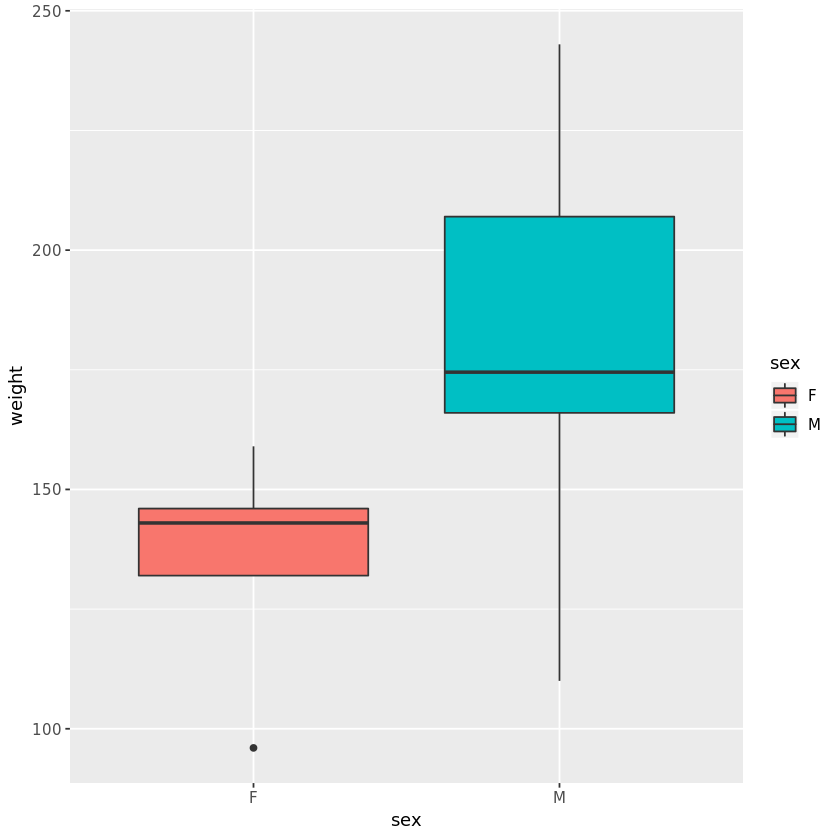

In [12]:
# Basic box plot from data frame
qplot(sex, weight, data = rdf, geom= "boxplot", fill = sex)

In [17]:
b <- ggplot(rdf, aes(x = age, y = weight))

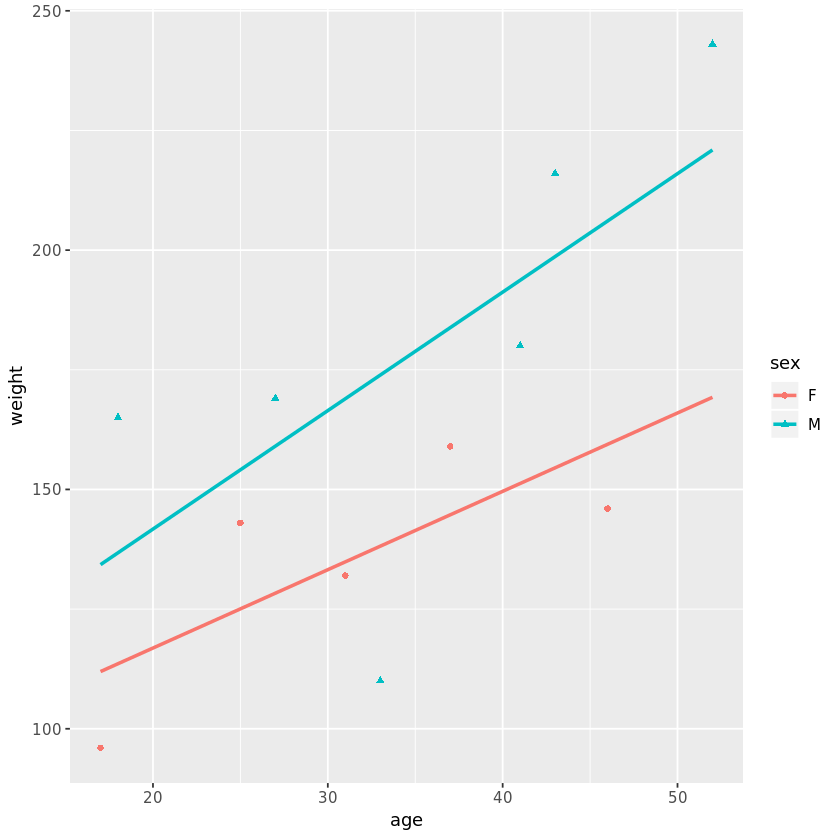

In [26]:
b + geom_point(aes(color = sex, shape = sex)) + 
    geom_smooth(aes(color = sex), method = lm, se = FALSE, fullrange = TRUE)